In [1]:
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
from matplotlib import pyplot as plt

## problem 1

In [2]:
c = SkyCoord(ra='10h30m30s', dec='10:12:30', unit=(u.hourangle, u.deg))

In [3]:
c.representation_type = 'cartesian'

In [4]:
c

<SkyCoord (ICRS): (x, y, z) [dimensionless]
    (-0.91007388, 0.37464091, 0.17722788)>

# problem 2

In [5]:
c = SkyCoord(l='0', b='0', unit=(u.deg, u.deg), frame='galactic')

In [6]:
c

<SkyCoord (Galactic): (l, b) in deg
    (0., 0.)>

In [7]:
c.transform_to('icrs')

<SkyCoord (ICRS): (ra, dec) in deg
    (266.40498829, -28.93617776)>

# What constellation

# problem 3

In [8]:
ra_list = np.linspace(0, 360, 12)

l, b = [], []
for ra in ra_list:
    c = SkyCoord(ra=ra*u.deg, dec=40*u.deg)
    d = c.transform_to('galactic')
    l.append(d.l.degree)
    b.append(d.b.degree)

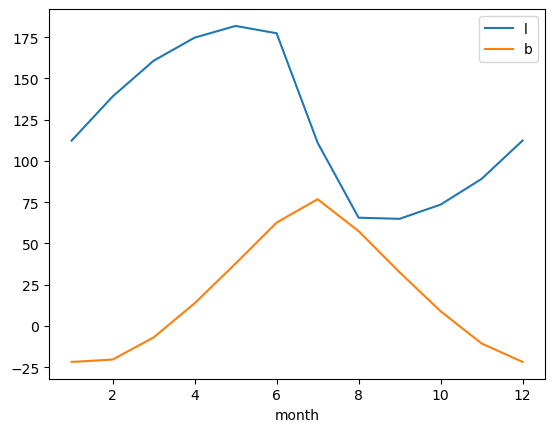

In [9]:
month = np.arange(1., 13., 1)
plt.plot(month, l, label='l')
plt.plot(month, b, label='b')
plt.xlabel('month')
plt.legend()
plt.show()

# problem 4

In [10]:
from astropy.time import Time
from astropy.coordinates import get_body_barycentric

In [11]:
from astropy.coordinates import HeliocentricTrueEcliptic

t = Time.now()
coord = get_body_barycentric('moon', t)
coord_sky = SkyCoord(coord, frame="icrs")

In [12]:
coord_sky.transform_to(HeliocentricTrueEcliptic())

<SkyCoord (HeliocentricTrueEcliptic: equinox=J2000.000, obstime=J2000.000): (lon, lat, distance) in (deg, deg, AU)
    (138.03921417, 0.00865942, 0.98445655)>

In [13]:
from astropy.coordinates import ICRS

coord_sky = SkyCoord(x=coord.x, y=coord.y, z=coord.z, frame=ICRS(), representation_type="cartesian")

In [14]:
coord_sky.transform_to(HeliocentricTrueEcliptic())

<SkyCoord (HeliocentricTrueEcliptic: equinox=J2000.000, obstime=J2000.000): (lon, lat, distance) in (deg, deg, AU)
    (138.03921417, 0.00865942, 0.98445655)>

In [15]:
coord_sky.transform_to(ICRS())

<SkyCoord (ICRS): (x, y, z) in AU
    (-0.73922535, 0.60116195, 0.26102223)>

In [16]:
coord_icrs = SkyCoord(ra=140.87241471 * u.deg, 
                      dec=15.32291644 * u.deg, 
                      distance=0.98791145 * u.AU, 
                      frame="icrs")

In [17]:
coord_ecliptic = coord_icrs.transform_to(HeliocentricTrueEcliptic())